# VU DMT Assignment 2 - group 128

### "More specifically, your task is to predict what hotel a user is most likely to book."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
df_train = pd.read_csv("data/training_set_VU_DM.csv")
df_submission = pd.read_csv("data/submission_sample.csv")
df_test = pd.read_csv("data/test_set_VU_DM.csv")

Check raw datasat

In [3]:
# display(df_train)
# df_train.shape
df_train.head
# df_train.info()
df_train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

Tried to check base stats, but there are too many columns so will need to drop some first in order to get a better idea

In [4]:
base_stats = []

for col in df_train:
    stats_col = df_train[col].describe()
    base_stats.append(stats_col)
    
print(base_stats)

[count    4.958347e+06
mean     1.663666e+05
std      9.611223e+04
min      1.000000e+00
25%      8.293600e+04
50%      1.665070e+05
75%      2.497240e+05
max      3.327850e+05
Name: srch_id, dtype: float64, count                 4958347
unique                 198615
top       2012-11-02 14:04:51
freq                       95
Name: date_time, dtype: object, count    4.958347e+06
mean     9.953133e+00
std      7.646890e+00
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      1.400000e+01
max      3.400000e+01
Name: site_id, dtype: float64, count    4.958347e+06
mean     1.753405e+02
std      6.591625e+01
min      1.000000e+00
25%      1.000000e+02
50%      2.190000e+02
75%      2.190000e+02
max      2.310000e+02
Name: visitor_location_country_id, dtype: float64, count    251866.000000
mean          3.374334
std           0.692519
min           1.410000
25%           2.920000
50%           3.450000
75%           3.930000
max           5.000000
Name: visitor_hist_sta

Price distribution per hotel (ranging between 0 and 600 usd)

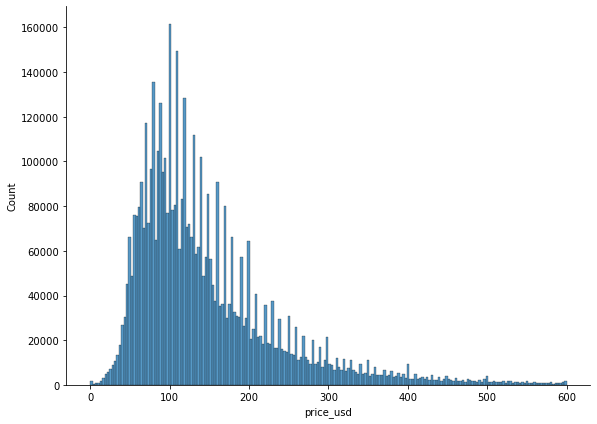

In [5]:
sns.displot(data=df_train, x='price_usd', kind='hist',
            height=6, aspect=1.4, bins=200,
            binrange=(0,600))
# price_counted = df_train['price_usd'].value_counts(ascending=False).head()


Insight in distribution of clicked and booked hotels

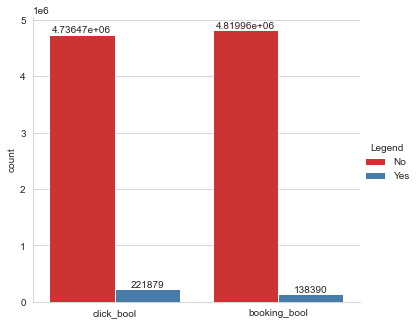

In [6]:

df_long = df_train.melt(value_vars=['click_bool', 'booking_bool'], value_name='Legend').replace({'Legend': {0: 'No', 1: 'Yes'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1')
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

we're only interested in the bookings so we can drop the rows were 'booking_bool' = 0

In [7]:
# check number of clicks (0) and bookings (1) in dataframe
# df_train['booking_bool'].value_counts()
df_train['click_bool'].value_counts()


# df_train['booking_bool'].values.sum()

0    4736468
1     221879
Name: click_bool, dtype: int64

In [8]:
df_train = df_train.drop(df_train[df_train.booking_bool == 0].index)
df_train.shape

(138390, 54)

In [9]:
# print(df_train['prop_id'].nunique())
print(df_train['prop_id'].value_counts().loc[lambda x: x>5])
# print(df_train[df_train.prop_id > 10 ].value_counts())
#  df2.mi.value_counts().loc[lambda x: x>5].reset_index()['index']
# print(df_train['prop_id'].value_counts()>10 == True)

# df_train = df_train.drop(df_train[df_train.booking_bool == 0].index)


116942    159
22578     140
77089     122
53494     117
137997    109
         ... 
91592       6
44040       6
28246       6
94503       6
40057       6
Name: prop_id, Length: 5854, dtype: int64


Correlation matrix

In [ ]:
import seaborn as sns

sns.set(style="white")
sns.set(font_scale=.3)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,5), dpi=2000)

sns_plot=sns.heatmap(df_train.corr(), mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.set_context("paper")   

sns_plot.figure.savefig("plots/diagonalcorrelation.png",dpi=2000)

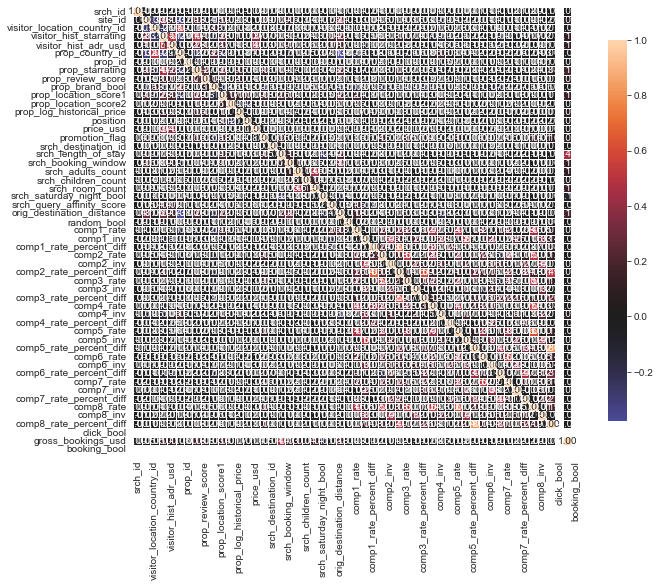

In [10]:



def correlation_heatmap(df_train):
    correlations = df_train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(df_train)